In [1]:
import matplotlib.pyplot as plt
from ai4ha.data.series.MITBIHDataLoader import MITBIHtrain
from ai4ha.data.series.KUHARDataLoader import KUHARtrain
from ai4ha.data.series.PTBXLDataLoader import PTBXLtrain
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.manifold import TSNE
import numpy as np

In [20]:
orig = MITBIHtrain(filename="/home/bejar/ssdstorage/MITBIH/mitbih_train.csv", n_samples=3000, resamp=False)
print(orig[0][0].shape)
odata = [d[0].squeeze() for d in orig]
sdata = np.array(odata)


Class 0 = (72471, 188)
Class 1 = (2223, 188)
Class 2 = (5788, 188)
Class 3 = (641, 188)
Class 4 = (6431, 188)
X_train shape is (87554, 1, 1, 187)
y_train shape is (87554,)
PAD=0 PADALGO=zero
(1, 1, 187)


In [21]:
datal = [int(d[1]) for d in orig]

In [5]:
sdata.shape

(87554, 187)

In [56]:
# WaveGAN-MITBIH-G-LD512-ID32-IC64-K8-S2-IN-D-NL4-IC16-K16-S2-SF2-SN-GP05 ++
# WaveGAN-MITBIH-G-LD512-ID32-IC64-K8-S2-NN-D-NL4-IC16-K16-S2-SF2-SN-GP05 +
# WaveGAN-MITBIH-G-LD512-ID32-IC64-K8-S2-BN-D-NL4-IC16-K16-S2-SF2-SN-GP05 -

# WaveGAN-MITBIH-G-LD512-ID32-IC64-K8-S2-IN-D-NL4-IC16-K16-S2-SF0-SN-GP05 ++++++
# WaveGAN-MITBIH-G-LD512-ID32-IC64-K8-S2-IN-D-NL5-IC16-K16-S2-SF0-SN-GP05 ++++
# WaveGAN-MITBIH-G-LD512-ID32-IC64-K8-S2-IN-D-NL3-IC16-K16-S2-SF0-SN-GP05 +++++
# WaveGAN-MITBIH-G-LD512-ID32-IC64-K8-S2-IN-D-NL4-IC16-K16-S2-SF0-SN-GP1 +++
# WaveGAN-MITBIH-G-LD512-ID32-IC64-K8-S2-NN-D-NL3-IC16-K16-S2-SF0-SN-GP05 ++++
# WaveGAN-MITBIH-G-LD512-ID32-IC64-K16-S2-IN-D-NL4-IC16-K16-S2-SF0-SN-GP05 +++
# WaveGAN-MITBIH-G-LD512-ID32-IC64-K8-S2-NN-D-NL3-IC8-K4-S2-SF0-SN-GP1 +-

# WaveGAN-MITBIH-G-LD512-ID32-IC64-K8-S2-BN-D-NL3-IC16-K16-S2-SF0-SN-GP05 ++

# ---

# WaveUpGAN-MITBIH-G-LD256-ID16-IC256-K7-S2-BN-D-NL3-IC16-K4-S2-SF0-SN-GP05 +
# WaveUpGAN-MITBIH-G-LD256-ID16-IC256-K7-S2-IN-D-NL3-IC16-K4-S2-SF0-SN-GP1 ~
# WaveUpGAN-MITBIH-G-LD256-ID16-IC256-K15-S2-IN-D-NL3-IC16-K8-S2-SF0-SN-GP05 +~
# WaveUpGAN-MITBIH-G-LD256-ID16-IC256-K15-S2-IN-D-NL4-IC16-K16-S2-SF0-SN-GP05 ++++
# WaveUpGAN-MITBIH-G-LD256-ID16-IC256-K15-S2-IN-D-NL3-IC16-K16-S2-SF0-SN-GP05 ++++

# ---

# MITBIH-zero-b64-G-TTSGAN_l192_c1_d128_ce10_le10_n3_h8_pFalse-D-TTSGAN_d64_le10_n3_h8-OPT-adam-lr4-LS-lw1 +++


In [4]:
model = 'MITBIH-zero-b64-G-TTSGAN_l192_c1_d128_ce10_le10_n3_h8_pFalse-D-TTSGAN_d64_le10_n3_h8-OPT-adam-lr4-LS-w1'
modeltype = 'GAN'
PATH = f'/home/bejar/bsc/misiones/Series/Models/{modeltype}/logs/{model}/samples/'
data = np.load(PATH + 'samples.npy')
labels = np.load(PATH + 'labels.npy')

In [5]:
data.shape

(10000, 1, 1, 192)

In [104]:
# labels = np.reshape(data['classes'], (-1, 1))
# data = np.reshape(data['samples'], (-1, 1, 192))
# data.shape

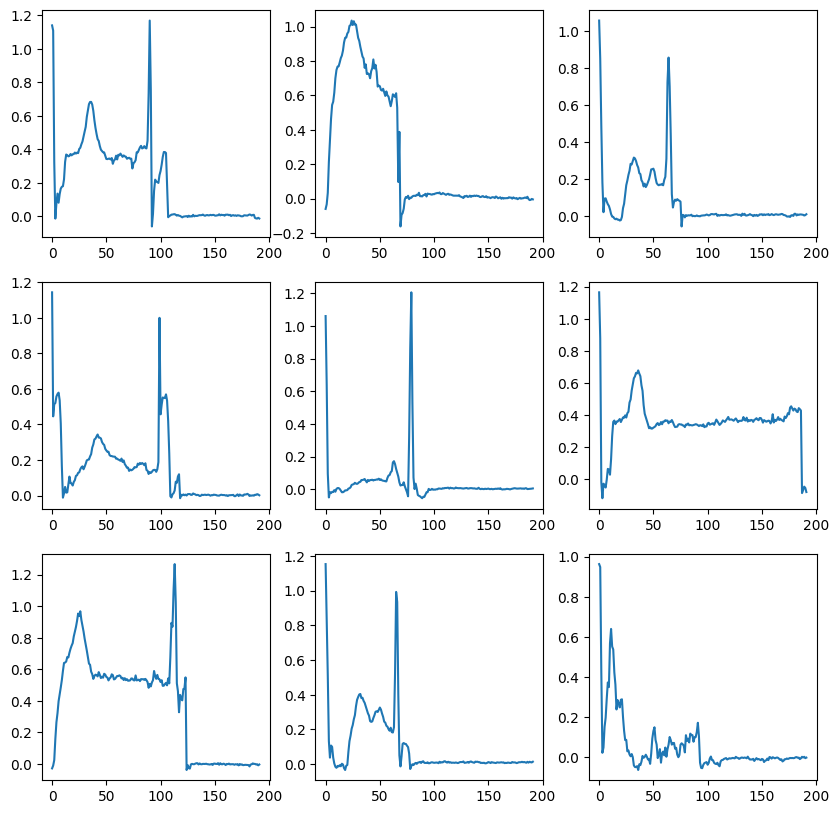

In [6]:
fig = plt.figure(figsize=(10, 10))
for i in range(1, 10):
    fig.add_subplot(3, 3, i)
    plt.plot(data[i+100].squeeze())

In [121]:
data.squeeze().shape, sdata.shape

((1000, 256), (87554, 187))

In [7]:
all = np.concatenate((data.squeeze()[:,:187], sdata), axis=0)

In [8]:
tsne = TSNE(n_components=2, perplexity=10, n_iter=2000,
            init='random').fit_transform(all)


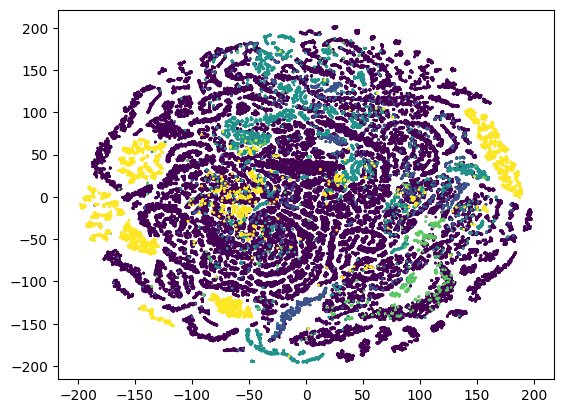

In [9]:
plt.scatter(tsne[data.shape[0]:, 0], tsne[data.shape[0]:, 1], c=datal, s=1, cmap='viridis');
# plt.scatter(tsne[:data.shape[0], 0], tsne[:data.shape[0], 1],c=labels.squeeze(),cmap='viridis', s=50, marker='x');

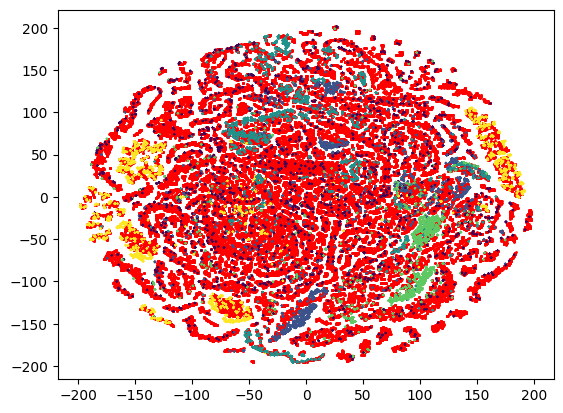

In [10]:
plt.scatter(tsne[data.shape[0]:, 0], tsne[data.shape[0]:, 1], c='r', s=1, cmap='viridis')
plt.scatter(tsne[:data.shape[0], 0], tsne[:data.shape[0], 1],c=labels.squeeze(),cmap='viridis', s=1, marker='x');

# Loss

In [2]:
import pandas as pd

In [43]:
model = 'PTBXLC-zero-b8-G-TTSGAN_ld128_de64_ce16_l6_h8_dr0.5_pFalse-D-TTSGAN_p2_d64_ce10_n6_dr0.0_h8_clclasstoken-OPT-adamw-lr0.0001-LS-w1'
modeltype = 'GAN'
# modeltype = 'TimeDiffusion'
path = f'/home/bejar/bsc/misiones/Series/Models/{modeltype}/logs/{model}/logs/losslog.csv'
loss = pd.read_csv(path)
loss.tail(7)

,lossD,lossG,loss_real,loss_fake,gp
3,-4.196547,-2.086981,7.705255,2.403281,1.105428
4,-3.736488,0.567940,4.443431,-0.132258,0.839202
5,-3.976168,-17.504971,23.789360,17.909851,1.903341
6,-5.798762,-11.379621,20.116807,11.791373,2.526671
7,-16.957903,8.718373,18.581019,-7.993492,9.616609
8,-10.351683,34.654683,-17.801349,-34.027199,5.874167
9,-12.977766,32.175079,-11.222740,-31.476934,7.276428


<Axes: >

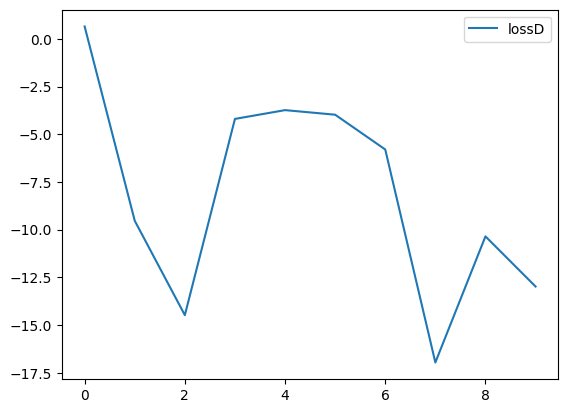

In [44]:
loss.iloc[-10:].plot(y=['lossD'])
# loss.iloc[0:].plot(y=['MSEloss'])

---

In [5]:
# orig = KUHARtrain(filename="/home/bejar/bsc/Data/KU-HAR/KU-HAR.csv",
#                   padding=20)
orig = PTBXLtrain(dir="/home/bejar/bsc/Data/ptbxl_c",
                     padding=24, padalgo='zero')

Loading data from /home/bejar/bsc/Data/ptbxl_c
PTBXL train NPZ True
X_train shape is (16427, 12, 1024)
y_train shape is (16427,)
NClasses: 7 [0 1 2 3 4 5 6]
PAD=24 PADALGO=zero


In [6]:
odata = [d[0].squeeze() for d in orig]
sdata = np.array(odata)
length = 1000

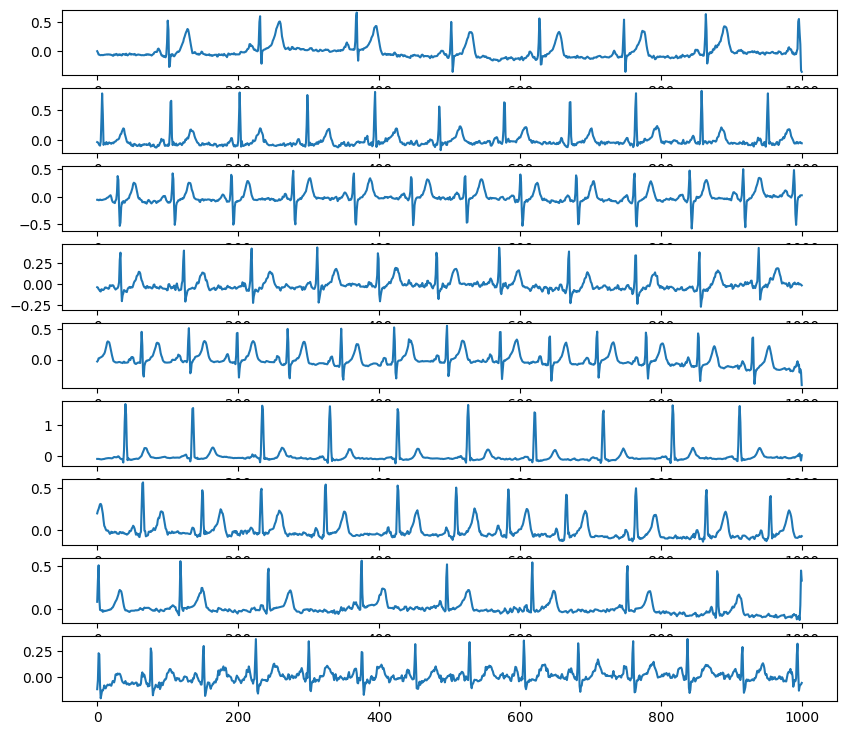

In [7]:
fig = plt.figure(figsize=(10, 10))
for i in range(1, 10):
    fig.add_subplot(10, 1, i)
    plt.plot(sdata[i,0,:length])

In [7]:
datal = [int(d[1]) for d in orig]

In [45]:
# model = 'WaveGAN-KUHAR-G-LD512-ID20-IC128-K16-S2-IN-D-NL4-IC16-K16-S2-SF0-SN-GP05'
modeltype = 'GAN'
PATH = f'/home/bejar/bsc/misiones/Series/Models/{modeltype}/logs/{model}/samples/'
with np.load(PATH + 'sampled_data.npz') as dfile:
    data = dfile['samples']
    labels = dfile['classes']

In [23]:
data.shape

(10000, 12, 1024)

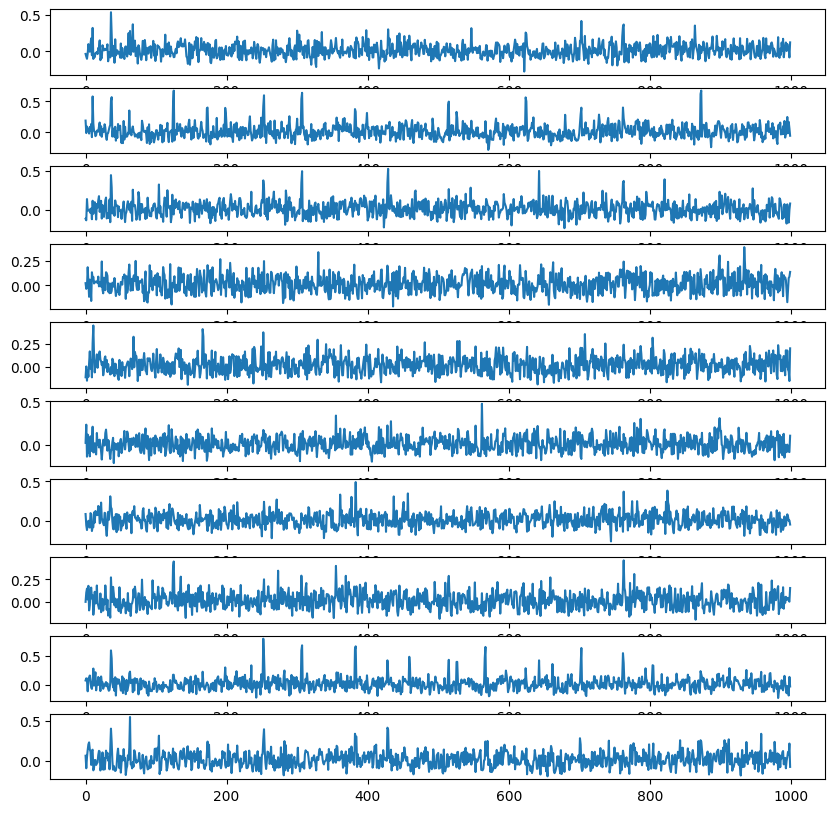

In [46]:
ch = 0
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    fig.add_subplot(10, 1, i+1)
    plt.plot(data[i,ch,:length])

In [13]:
d=0
all = np.concatenate((data.squeeze()[:,d,:length], sdata[:,d,:length]), axis=0)

In [14]:
tsne = TSNE(n_components=2, perplexity=10, n_iter=2000,
            init='random').fit_transform(all)


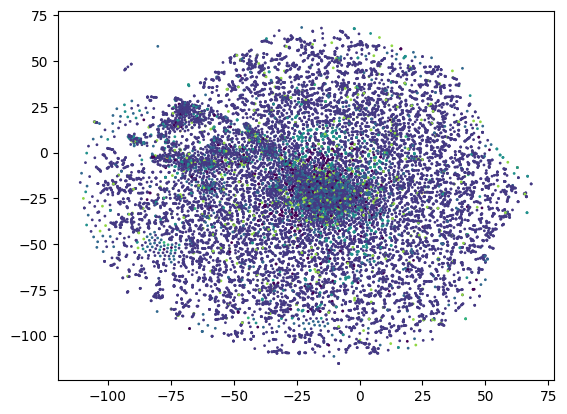

In [15]:
plt.scatter(tsne[data.shape[0]:, 0], tsne[data.shape[0]:, 1], c=datal, s=1, cmap='viridis');

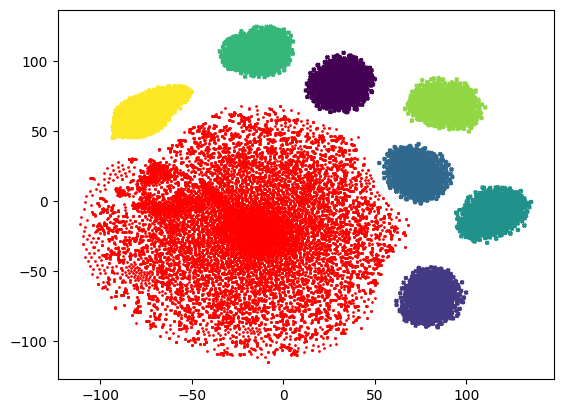

In [16]:
plt.scatter(tsne[data.shape[0]:, 0], tsne[data.shape[0]:, 1], c='r', s=1, cmap='viridis')
plt.scatter(tsne[:data.shape[0], 0], tsne[:data.shape[0], 1],c=labels.squeeze(),cmap='viridis', s=5, marker='x');

In [66]:
d = pd.read_csv("/home/bejar/bsc/Data/KU-HAR/KU-HAR.csv", header=None)

In [67]:
d.head()

,0,1,2,3,4,5,6,7,8,9,...,1793,1794,1795,1796,1797,1798,1799,1800,1801,1802
0,0.004230,-0.000280,-0.013906,-0.002544,0.027433,0.058300,0.051670,0.071857,0.080653,0.047917,...,-0.016692,-0.018566,-0.017361,-0.017919,-0.016680,-0.016650,-0.013097,0,300,1
1,0.012482,0.032496,0.067856,0.071552,0.078103,0.040353,-0.001059,-0.018580,-0.026813,-0.011280,...,-0.008210,-0.010408,-0.011459,-0.011747,-0.010394,-0.008070,-0.004354,0,300,2
2,0.012127,0.028458,0.062075,0.052611,0.022942,-0.010017,-0.023151,-0.028515,0.005036,0.008450,...,0.000915,0.000771,-0.002560,-0.003020,-0.004190,0.000215,0.000850,0,300,3
3,0.052964,0.074319,0.110670,0.108490,0.091825,0.056989,0.029337,-0.016724,-0.042265,-0.053983,...,-0.001209,0.002878,0.000663,0.000982,-0.002148,-0.009200,-0.010653,0,300,4
4,-0.020462,-0.030787,-0.008617,0.008906,0.045046,0.042136,0.045037,0.045182,0.025113,0.021730,...,-0.006369,-0.006614,-0.004698,-0.007279,-0.006861,-0.006161,-0.006113,0,300,5


In [68]:
np.max(d[2])

147550.0

In [73]:
m = d.iloc[:, :-3].values

In [92]:
m = m.reshape(m.shape[0], 6,300)

In [109]:
d = 5
np.mean(m[:,d,:]), np.quantile(m[:,d,:], 0.99), np.quantile(m[:,d,:], 0.01)

(140.37903033791133, 1.6813, -1.3615)

In [89]:
np.sum(m<-20)

109559

In [246]:
m[:,0,:] = (m[:,0,:] - np.min(m[:,0,:])) / (np.max(m[:,0,:]) - np.min(m[:,0,:]))

In [191]:
m = np.swapaxes(m, 0, 1)

In [227]:
np.std(m)

3906.2735086116886

In [33]:
plt.plot(m[0,1,:])

NameError: name 'm' is not defined